In [1]:
import pyarrow.parquet as pq
import pyarrow as pa
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path
from scipy.stats import ttest_ind_from_stats

In [15]:
game_stats_path = r"C:\Users\Maxip\Desktop\Personale\Università\MBD\games_stats_elab"
player_stats_path = r"C:\Users\Maxip\Desktop\Personale\Università\MBD\player_stats_elab"

## Read games stats

In [40]:
files = list(Path(game_stats_path).rglob('*.parquet'))
tables = [pq.read_table(file) for file in files]
merged_table = pa.concat_tables(tables)

games_stats_df = merged_table.to_pandas()

games_stats_df.fillna(0,inplace=True)
games_stats_df = games_stats_df.astype(int,errors='ignore')

games_stats_df.head()

,TimeControl,Abandoned,Normal,Rules infraction,Time forfeit
0,360,1680,148746,32,25140
1,420,5518,440372,90,64306
2,480,1040,253726,62,38616
3,540,0,35902,20,5430
4,600,38362,23664000,5318,3056348


## Read player stats

In [30]:
files = list(Path(player_stats_path).rglob('*.parquet'))
tables = [pq.read_table(file) for file in files]
merged_table = pa.concat_tables(tables)

player_stats_df = merged_table.to_pandas()

player_stats_df.fillna(0,inplace=True)
player_stats_df = player_stats_df.astype(int,errors='ignore')
player_stats_df = player_stats_df.sort_values(by='avg_elo',ascending=True)

player_stats_df.head()

,avg_elo,count
2257,400,2
1833,405,1
2087,407,3
2128,408,2
2235,409,1


## Plot

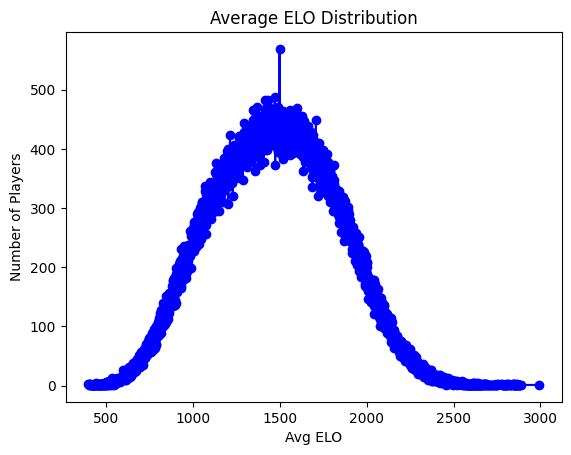

In [43]:
values = player_stats_df['avg_elo']
occurrences = player_stats_df['count']

# Create a continuous line plot
plt.plot(values, occurrences, marker='o', linestyle='-', color='blue')

# Add labels and title
plt.title("Average ELO Distribution")
plt.xlabel("Avg ELO")
plt.ylabel("Number of Players")

# Show the plot
plt.show()

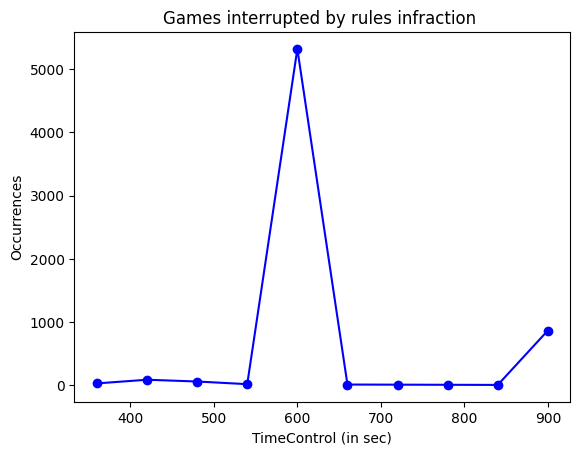

In [44]:
values = games_stats_df['TimeControl'][:10]
occurrences = games_stats_df['Rules infraction'][:10]

# Create a continuous line plot
plt.plot(values, occurrences, marker='o', linestyle='-', color='blue')

# Add labels and title
plt.title("Games interrupted by rules infraction ")
plt.xlabel("TimeControl (in sec)")
plt.ylabel("Occurrences")

# Show the plot
plt.show()

### Statistical Significance Test
We are going to perform a statistical test for the means based on descriptive statistics. All tests are set on a confidence level $\alpha = 0.05$ and have as hypothesis:
<br>(*Null hypothesis*) $H_0: \mu_1 = \mu_2$
<br>(*Altenrative hyothesis*) $H_1: \mu_1 < \mu_2$
<br> Where $\mu_1$ is the sample mean of non cheaters and $\mu_2$ of the cheaters
<br>![Getting Started](./Data_comparison.png)

### win_rate

In [2]:
#Population means
non_cheaters_mean = 0.4979715563324271
cheaters_mean = 0.6386031331592686

#population stddev
non_cheaters_stddev = 0.13269082065314636
cheaters_stddev = 0.2119384710085416

t_statistic, p_value = ttest_ind_from_stats(non_cheaters_mean, non_cheaters_stddev,432504 , cheaters_mean, cheaters_stddev, 766)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -29.266999080318335
p-value: 4.169267630997422e-188


The p value is $<0.05$ so we cannot accept the null hypothesis and hence the differnce is statistically significant

### avg_elo

In [3]:
#Population means
non_cheaters_mean = 1472.7042152904949
cheaters_mean = 1563.1283159268926

#population stddev
non_cheaters_stddev = 357.42272502600787
cheaters_stddev = 389.2260420824891

t_statistic, p_value = ttest_ind_from_stats(non_cheaters_mean, non_cheaters_stddev,432504 , cheaters_mean, cheaters_stddev, 766)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -6.994568396196882
p-value: 2.6645937279437478e-12


p-val $<0.5$ so with a confidence level $\alpha$ we have enough evidence to refuse null hypothesis, hence elo difference is significant

### EloIncrement

In [4]:
#Population means
non_cheaters_mean = -14.277821708007325
cheaters_mean = 72.68929503916449

#population stddev
non_cheaters_stddev = 208.95550572654565
cheaters_stddev = 395.50835006384057

t_statistic, p_value = ttest_ind_from_stats(non_cheaters_mean, non_cheaters_stddev,432504 , cheaters_mean, cheaters_stddev, 766)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -11.48268474996178
p-value: 1.628455419905497e-30


We cannot accept the null hypothesis, differences are statistically signifcant